In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings
from scipy.stats import f_oneway
warnings.filterwarnings('ignore')

In [2]:
dengue = pd.read_csv('datasets\\dengue.csv')

In [3]:
dengue

,Month,Year,Region,Dengue_Cases,Dengue_Deaths
0,January,2016,Region I,705,1
1,February,2016,Region I,374,0
2,March,2016,Region I,276,0
3,April,2016,Region I,240,2
4,May,2016,Region I,243,1
...,...,...,...,...,...
1015,August,2020,BARMM,91,0
1016,September,2020,BARMM,16,8
1017,October,2020,BARMM,13,9
1018,November,2020,BARMM,15,1


In [4]:
dengue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1020 entries, 0 to 1019
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Month          1020 non-null   object
 1   Year           1020 non-null   int64 
 2   Region         1020 non-null   object
 3   Dengue_Cases   1020 non-null   int64 
 4   Dengue_Deaths  1020 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 40.0+ KB


In [5]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

In [6]:
dengue['Year'] = dengue['Year'].astype('int')

In [7]:
dengue.dtypes

Month            object
Year              int64
Region           object
Dengue_Cases      int64
Dengue_Deaths     int64
dtype: object

<h1>Q1: Which year has the highest number of recorded dengue cases?</h1>

In [8]:
dengue_year = dengue.groupby("Year")["Dengue_Cases"].sum().sort_values(ascending=False)
dengue_year

Year
2019    441902
2018    250783
2016    209544
2017    154155
2020     91041
Name: Dengue_Cases, dtype: int64

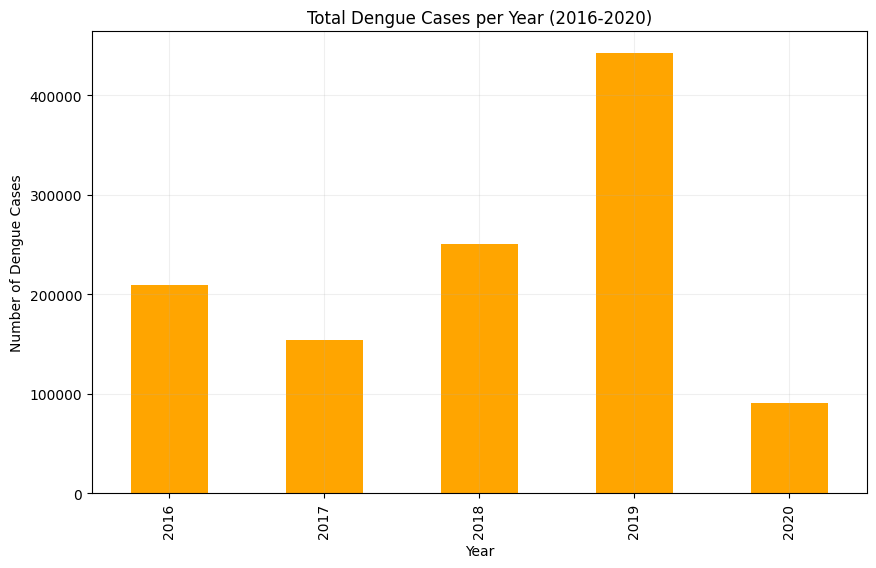

In [9]:
dengue.groupby("Year")["Dengue_Cases"].sum().plot(
    kind="bar",
    figsize=(10,6),
    color="orange",
    title="Total Dengue Cases per Year (2016-2020)"
)
plt.xlabel("Year")
plt.ylabel("Number of Dengue Cases")
plt.grid(alpha=0.2)
plt.show()

## **🎯 Insights**

1. According to the result of the analysis, year 2019 recorded the highest number of dengue cases, reaching 441,902 cases, which is significantly higher than any other year between 2016 and 2020, while year 2020 had the lowest number of dengue cases with 91,041 recorded. 

2. From 2017 to 2019, there was a sharp upward trend in dengue cases. After the peak in 2019, we can see a major drop in dengue cases in the data visualization, which may be related to the effects of pandemic lockdowns and reduced outdoor activity.

<h1>Q2: What is the average number of dengue cases per month?</h1>

In [10]:
monthly_dengue_avg = dengue.groupby("Month")["Dengue_Cases"].mean().sort_values(ascending=True)
monthly_dengue_avg.head(12)

Month
May           381.023529
April         382.447059
March         677.364706
June          683.647059
February      915.305882
January       992.094118
December     1040.364706
November     1116.470588
October      1384.058824
July         1626.376471
September    2093.447059
August       2206.517647
Name: Dengue_Cases, dtype: float64

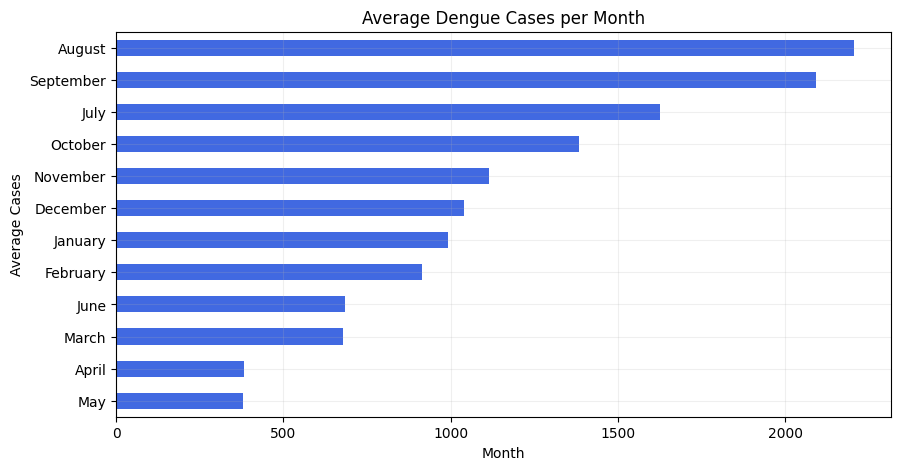

In [11]:
monthly_dengue_avg.plot(
    kind="barh",
    figsize=(10,5),
    color="royalblue",
    title="Average Dengue Cases per Month"
)
plt.xlabel("Month")
plt.ylabel("Average Cases")
plt.grid(alpha=0.2)
plt.show()

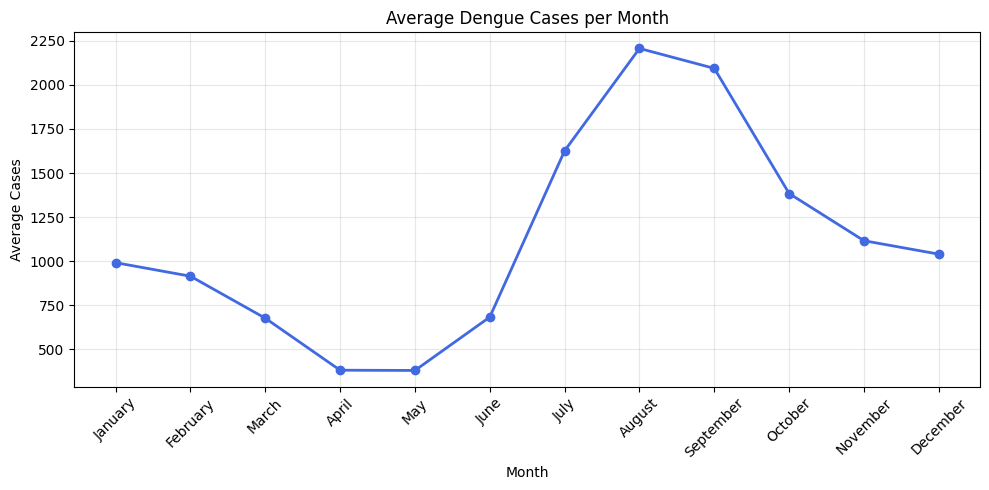

In [16]:
month_order = [
    "January", "February", "March", "April", "May", "June",
    "July", "August", "September", "October", "November", "December"
]

monthly_dengue_avg = monthly_dengue_avg.reindex(month_order)
plt.figure(figsize=(10, 5))
plt.plot(
    monthly_dengue_avg.index,
    monthly_dengue_avg.values,
    marker='o',
    color='royalblue',
    linewidth=2
)

plt.title("Average Dengue Cases per Month")
plt.xlabel("Month")
plt.ylabel("Average Cases")

plt.grid(alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## **🎯 Insights**
   
3. Based on the results of the analysis, it shows that the month of August recorded the highest average number of dengue cases, with 2,206 cases, making it the peak month for dengue transmission across all years. While September and July follow closely behind, both show high case averages.

4. In addition, we can actually see in the line plot that there is a sharp increase in dengue cases from June to August, signaling the start of the high-risk dengue season.

5. In contrast, April and May reported the lowest averages of dengue cases, with fewer than 400 cases in average, likely due to hotter, drier conditions that limit mosquito activity. This is likely when mosquito populations are at their lowest.

6. Overall, the trend demonstrates a strong seasonal pattern, with dengue cases rising sharply mid-year(June-Aug) and dropping toward the year’s end.

<h1>Q3: Which region has the highest total dengue cases?</h1>

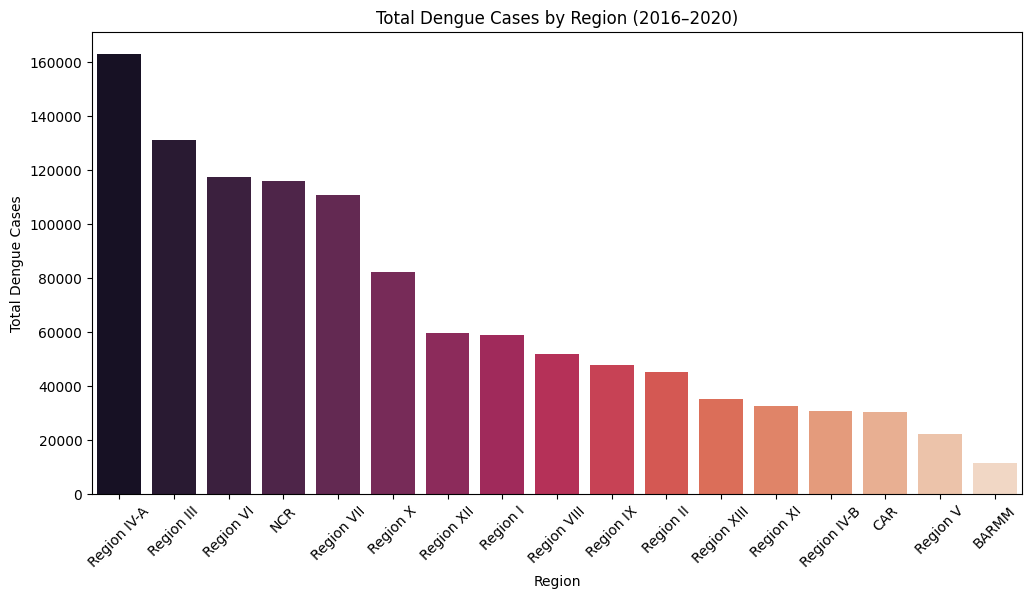

,Region,Dengue_Cases
0,Region IV-A,163029
1,Region III,131064
2,Region VI,117523
3,NCR,115966
4,Region VII,110683
5,Region X,82437
6,Region XII,59802
7,Region I,59066
8,Region VIII,51983
9,Region IX,47781


In [13]:
region_cases = dengue.groupby("Region")["Dengue_Cases"].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="Region", y="Dengue_Cases", data=region_cases, palette="rocket")
plt.title("Total Dengue Cases by Region (2016–2020)")
plt.xlabel("Region")
plt.ylabel("Total Dengue Cases")
plt.xticks(rotation=45)
plt.show()

region_cases.head(17)

## **🎯 Insights**

7. Based on the result of the analysis, the Region IV-A recorded the highest total dengue cases with 163,029 cases, making it the most affected region in the Philippines from 2016 to 2020.
   
8. Region III follows closely with 131,064 cases, indicating that dengue prevalence is high in areas near Metro Manila. While, BARMM (Bangsamoro Autonomous Region in Muslim Mindanao) has the lowest number of cases with a record of 11,537 dengue cases.

9. Regions in Luzon (IV-A, III, NCR, I, II) consistently show higher case counts compared to Mindanao regions, indicating a regional disparity in dengue incidence.

<h1>Q4: Which region shows the highest mortality rate(death rate) due to dengue?</h1>

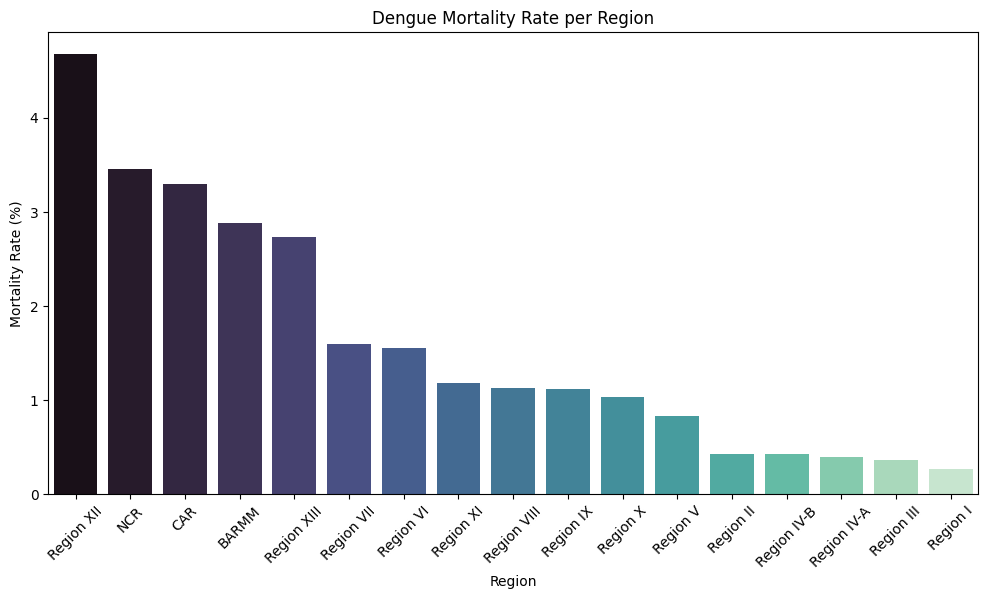

,Region,Dengue_Cases,Dengue_Deaths,Mortality_Rate
0,Region XII,59802,2796,4.675429
1,NCR,115966,4008,3.456185
2,CAR,30582,1008,3.296057
3,BARMM,11537,332,2.877698
4,Region XIII,35293,966,2.737087
5,Region VII,110683,1760,1.590127
6,Region VI,117523,1825,1.552888
7,Region XI,32522,385,1.183814
8,Region VIII,51983,585,1.125368
9,Region IX,47781,532,1.113413


In [14]:
region_mortality = dengue.groupby("Region")[["Dengue_Cases", "Dengue_Deaths"]].sum()
region_mortality["Mortality_Rate"] = (region_mortality["Dengue_Deaths"] / region_mortality["Dengue_Cases"]) * 100
region_mortality = region_mortality.sort_values("Mortality_Rate", ascending=False).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(x="Region", y="Mortality_Rate", data=region_mortality, palette="mako")
plt.title("Dengue Mortality Rate per Region")
plt.xlabel("Region")
plt.ylabel("Mortality Rate (%)")
plt.xticks(rotation=45)
plt.show()

region_mortality.head(17)

## **🎯 Insights**

10. According to the results of the analysis, Region XII recorded the highest dengue mortality rate at 4.68%, indicating that nearly five out of every 100 dengue cases resulted in death. Followed by The National Capital Region (NCR) followed with a mortality rate of 3.46% and Cordillera Administrative Region (CAR) with a mortality rate of 3.29%, which makes it the third highest mortality rate across all regions.

11. In contrast, Region I had the lowest mortality rate at 0.27%, demonstrating effective medical response systems and possibly stronger community-based dengue prevention measures.

12. Overall, the data analysis reveals that dengue mortality patterns vary widely across Philippine regions, emphasizing the importance of
region-specific strategies to improve dengue response and prevention.